### Questions

### Objectives

### Outline

* If you want to install plotly just run 
    * `!pip install plotly` in your jupyter notebook **OR**
    * `pip install plotly` in your terminal
    
* Load in data
* Make plotly visualizations
* Show how plotly can be used in dash apps

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("data/covid19.csv", encoding='ISO-8859-1')

In [44]:
df['dateRep'] = pd.to_datetime(df["dateRep"])
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-03-27,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
3,2020-03-24,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
4,2020-03-23,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0


In [45]:
df.sort_values(by="dateRep", inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2019-12-31,31,12,2019,0,0,Singapore,SG,SGP,5638676.0
1,2019-12-31,31,12,2019,0,0,Greece,EL,GRC,10727668.0
2,2019-12-31,31,12,2019,0,0,Lithuania,LT,LTU,2789533.0
3,2019-12-31,31,12,2019,0,0,Canada,CA,CAN,37058856.0
4,2019-12-31,31,12,2019,0,0,Brazil,BR,BRA,209469333.0


# Time Series Graphing in Pandas/Matplotlib

In [46]:
# in pandas with matplotlib

df_Afg = df.loc[df["countriesAndTerritories"]=="Afghanistan", ["dateRep", "cases"]]
df_Afg.head()

,dateRep,cases
20,2019-12-31,0
131,2020-01-01,0
190,2020-01-02,0
261,2020-01-03,0
271,2020-01-13,0


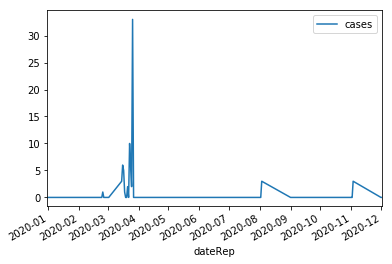

In [47]:
df_Afg.set_index("dateRep").plot()

# Time Series Plotting with Plotly

In [48]:
import plotly.graph_objects as go

In [49]:
fig = go.Figure()
df_Afg = df.loc[df["geoId"]=="AF"]
trace = go.Scatter(x=df_Afg["dateRep"], y=df_Afg["cases"], mode="lines+markers", name="AF")

fig.add_trace(trace)

# plotting multiple lines

In [57]:
usa_border_buddies = ["United_States_of_America", "Mexico", "Canada"]

fig = go.Figure()
df_USA = df.loc[df["countriesAndTerritories"]=="United_States_of_America"]
trace1 = go.Scatter(x=df_USA["dateRep"], y=df_USA["cases"], mode="lines+markers", name="US")
fig.add_trace(trace1)

df_MEXICO = df.loc[df["countriesAndTerritories"]=="Mexico"]
trace2 = go.Scatter(x=df_MEXICO["dateRep"], y=df_MEXICO["cases"], mode="lines+markers", name="Mexico")
fig.add_trace(trace2)



df_CANADA = df.loc[df["countriesAndTerritories"]=="Canada"]
trace3 = go.Scatter(x=df_CANADA["dateRep"], y=df_CANADA["cases"], mode="lines+markers", name="Canada")
fig.add_trace(trace3)


fig.show()

# Making the code DRY
<img src="images/dry-code.jpeg"/>

In [60]:
usa_border_buddies = ["United_States_of_America", "Mexico", "Canada"]

fig = go.Figure()

for country in usa_border_buddies:
    df_country = df.loc[df["countriesAndTerritories"]==country]
    geoId = df_country["geoId"].values[0]
    trace = go.Scatter(x=df_country["dateRep"], y=df_country["cases"], mode="lines+markers", name=geoId)
    fig.add_trace(trace)

fig.show()

# But like...what about the axes?
<img src="images/label-axis.jpg" />

In [62]:
fig = go.Figure()

for country in usa_border_buddies:
    df_country = df.loc[df["countriesAndTerritories"]==country]
    geoId = df_country["geoId"].values[0]
    trace = go.Scatter(x=df_country["dateRep"], y=df_country["cases"], mode="lines+markers", name=geoId)
    fig.add_trace(trace)

fig.update_layout(
    title="Covid Cases for CA/MX/USA",
    xaxis_title="Timeline",
    yaxis_title="Number of Covid Cases"
)
    
fig.show()

# Aligning the title

In [65]:
fig = go.Figure()

for country in usa_border_buddies:
    df_country = df.loc[df["countriesAndTerritories"]==country]
    geoId = df_country["geoId"].values[0]
    trace = go.Scatter(x=df_country["dateRep"], y=df_country["cases"], mode="lines+markers", name=geoId)
    fig.add_trace(trace)

fig.update_layout(
    title={
        "text": "Covid Cases for CA/MX/USA",
        "x":0.5,
        "xanchor": "center"
        },
    xaxis_title="Timeline",
    yaxis_title="Number of Covid Cases"
)
    
fig.show()

# Geo Plots

In [86]:
import plotly.express as px



df_total_cases = df[["cases", "countryterritoryCode"]]
df_total_cases = df_total_cases.groupby(by="countryterritoryCode").agg(sum).reset_index()
df_total_cases.head()


fig = px.scatter_geo(df_total_cases, 
                     locations="countryterritoryCode", 
                     locationmode="ISO-3", 
                     size="cases")

fig.show()

# Chloropleth

In [95]:
import plotly as py


df_total_cases = df[["cases", "countryterritoryCode"]]
df_total_cases = df_total_cases.groupby(by="countryterritoryCode").agg(sum).reset_index()
df_total_cases.head()


data = dict(
    type = 'choropleth',
    locations = df_total_cases["countryterritoryCode"],
    locationmode ='ISO-3',
    z=df_total_cases["cases"])

map = go.Figure(data=[data])

map.show()

### Assessment